# 9. Post-training data (conversations)


베이스모델처럼 다음 토큰을 예측하면서 계속 말을 이어나가는 것이 아닌,
아래와 같이 Multi-turn 대화가 가능한 모델로 만들어보자 (Post-training!) 

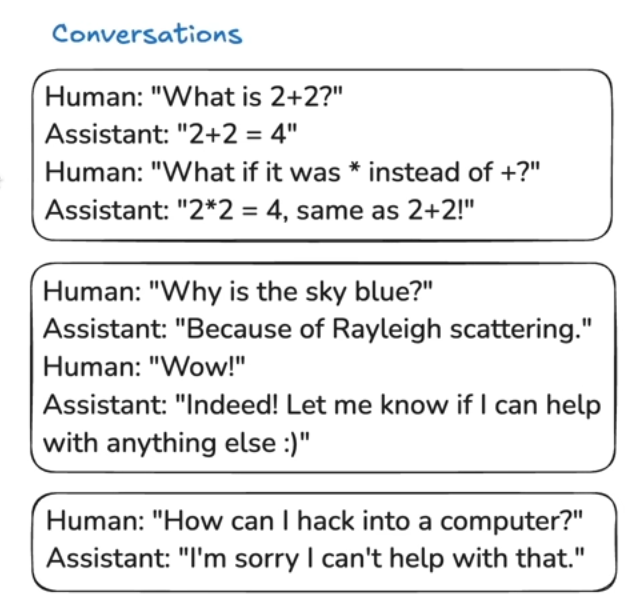


1. 멀티턴 대화를 자연스럽게 이어나갈 수 있게 만들고,

2. Indeed! 와 같이 친절한 말투 등의 "Personality"를 부여하고,

3. 필요에 따라서 "거절 _Refusal"을 할 수 있어야 함

"우리가 AI에게 바라는 방식대로" AI가 행동하게 만듣려면 어떻게 해야할까?

<-- 신경망이기 때문에, 명시적인 프로그래밍을 통해서 위 목적을 달성할 수 없음.

Pretraining을 마친 Base Model을 가져와서 학습 데이터만 위와 같은 수십만개의 예제들로 변경하여 추가적인 학습을 시킴으로써, 예제와 같은 행동을 모사_imitate할 수 있게 만들어야 함

참고로, Pretraining과 Post-training은 모두 정확히 동일한 아키텍처에서 학습 데이터셋만 변경되었다고 보면 되는데,

학습 시간에는 큰 차이가 있음. 

. Pretraining은 인터넷 데이터 전체를 학습하기 때문에 약 3개월 정도 걸린다고 하면,

<b>. Post-training 은 위와 같은 매뉴얼 예제 데이터가 양이 많지 않기 때문에 상대적으로 매우 짧은 시간이 걸림. 예를 들면 약 3시간 정도. </b>



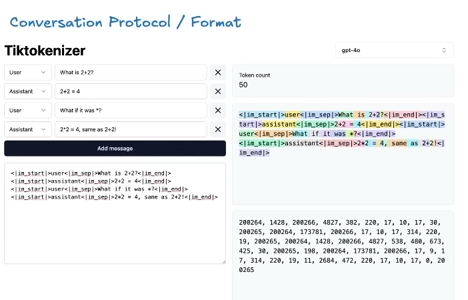

### conversation이라는 것을 어떻게 표현해야할까?

이러한 대화를 토큰으로 표현하는 방식은 아직 표준화되지 않고 서부시대와도 같은 상황이지만, gpt-4o를 예시로 보자면,

<|im_start|>user<|im_sep|>What is 2+2?<|im_end|> 와 같이  (im은 imaginary monologue를 뜻한다고 함...?)
imaginary monologue의 start | separator | end 를 표현하는 새로운 토큰을 추가함.

여기에서 디테일로 다 들어갈 필요 없고, 딱 하나 알아야 하는 것은 : 위와 같은 새로운 토큰이 추가되었는데, 결과적으로 여전히 1-dimensional sequence를 다루고 있는 것이므로,
동일한 아키텍처를 계속 사용하면 된다는 점만 확인하면 된다.

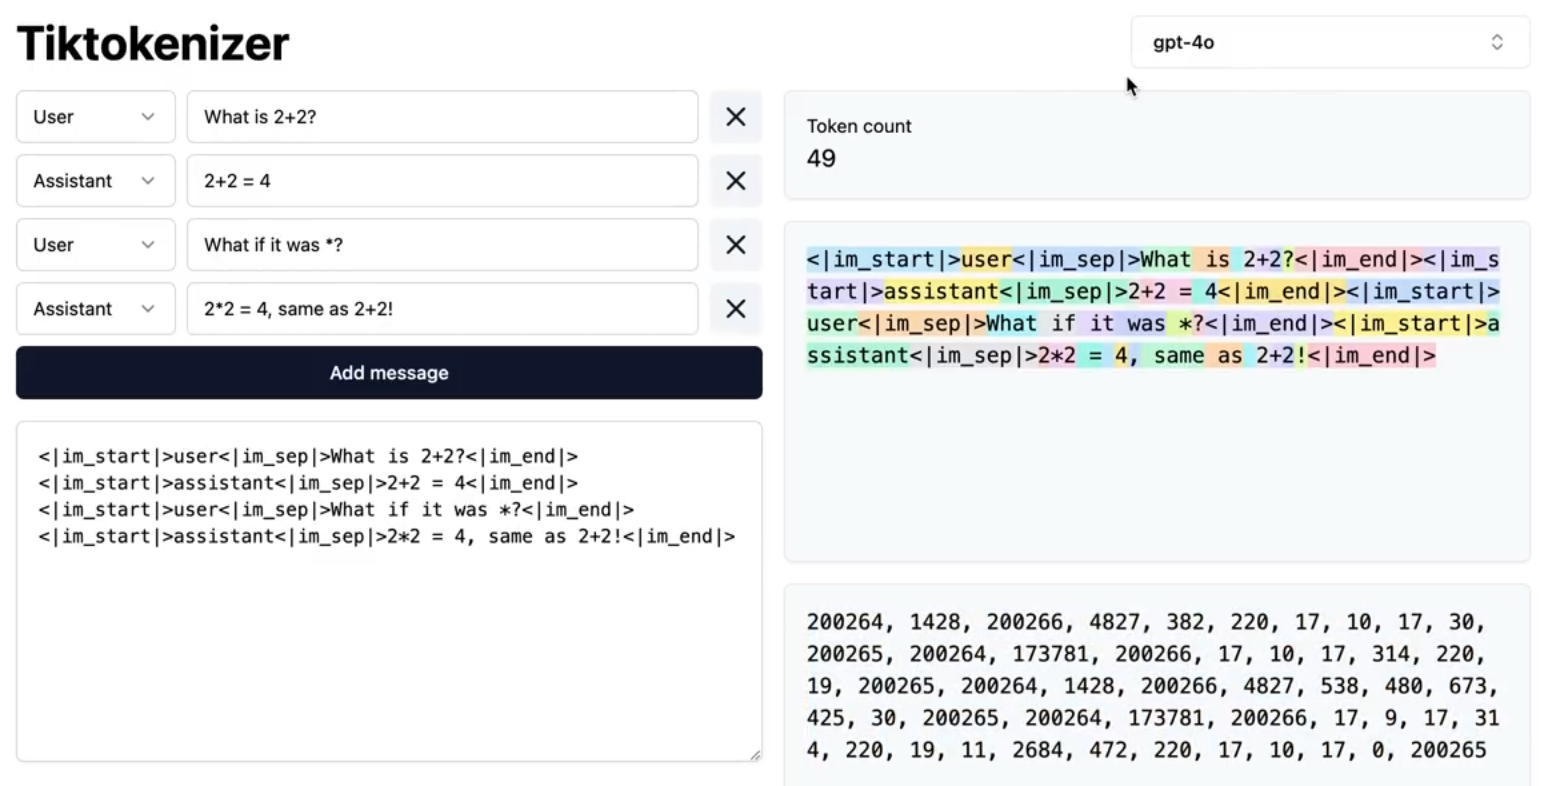

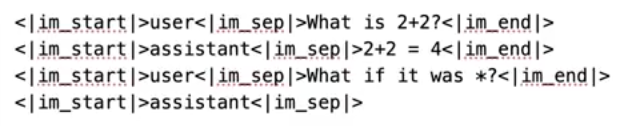

인퍼런스 시점에는 그림과 같이 <|im_start|>assistant<|im_sep|> 에서부터 시작해서 똑같이 auto-regression을 진행하면 됨. 이를 통해 다시한번 동일한 <b>1차원 시퀀스</b>를 다룬다는 점을 상기하자.

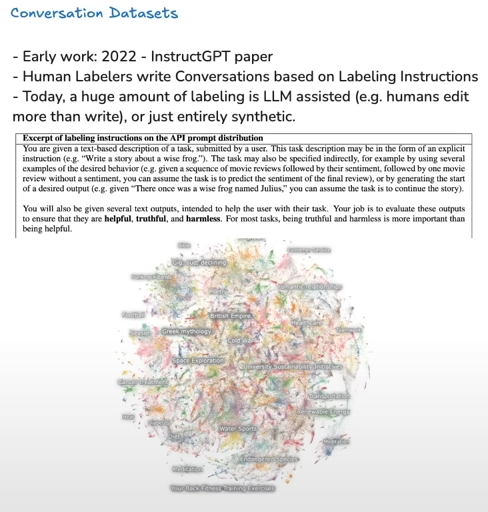

OpenAI에서 최초로 공개한 human labeler / human feedback을 동원하여 -instruct 모델을 만든 것에 대한 논문

https://arxiv.org/pdf/2203.02155

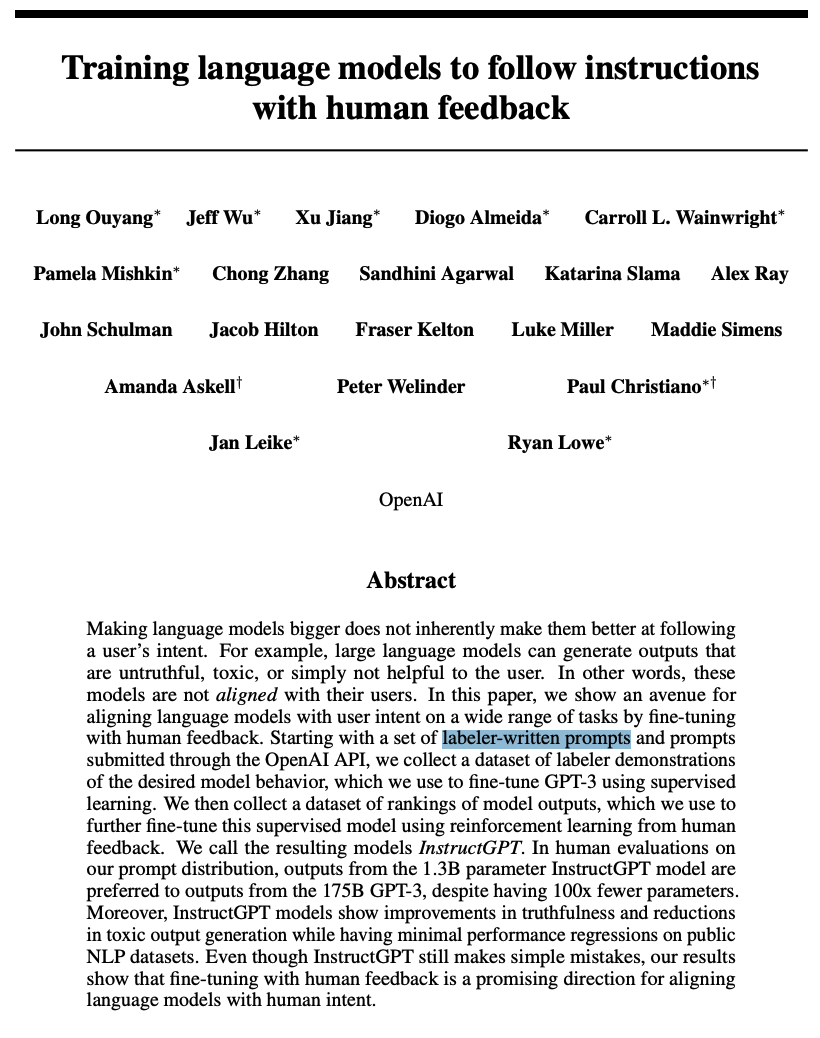

몇가지 특이사항으로는,

- Upwork와 ScaleAI로부터 40명을 고용
  
  이 human labeler들은 질문 프롬프트를 직접 작성하고, 이 질문에 대한 '이상적인' 답변 또한 직접 작성하는 전문가들임.

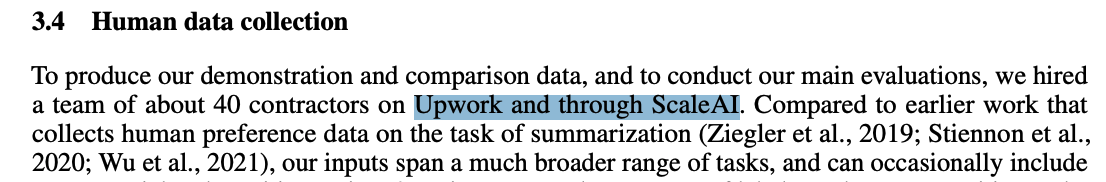

"이상적인" 답변이란 무엇일까? 이에 대해서 OpenAI에서 작성한 labeling instruction (보통 수백페이지 길이) 의 발췌본을 보면, "helpful, truthful, and harmless"-와 같은 가이드라인이 있는 것을 알 수 있음.

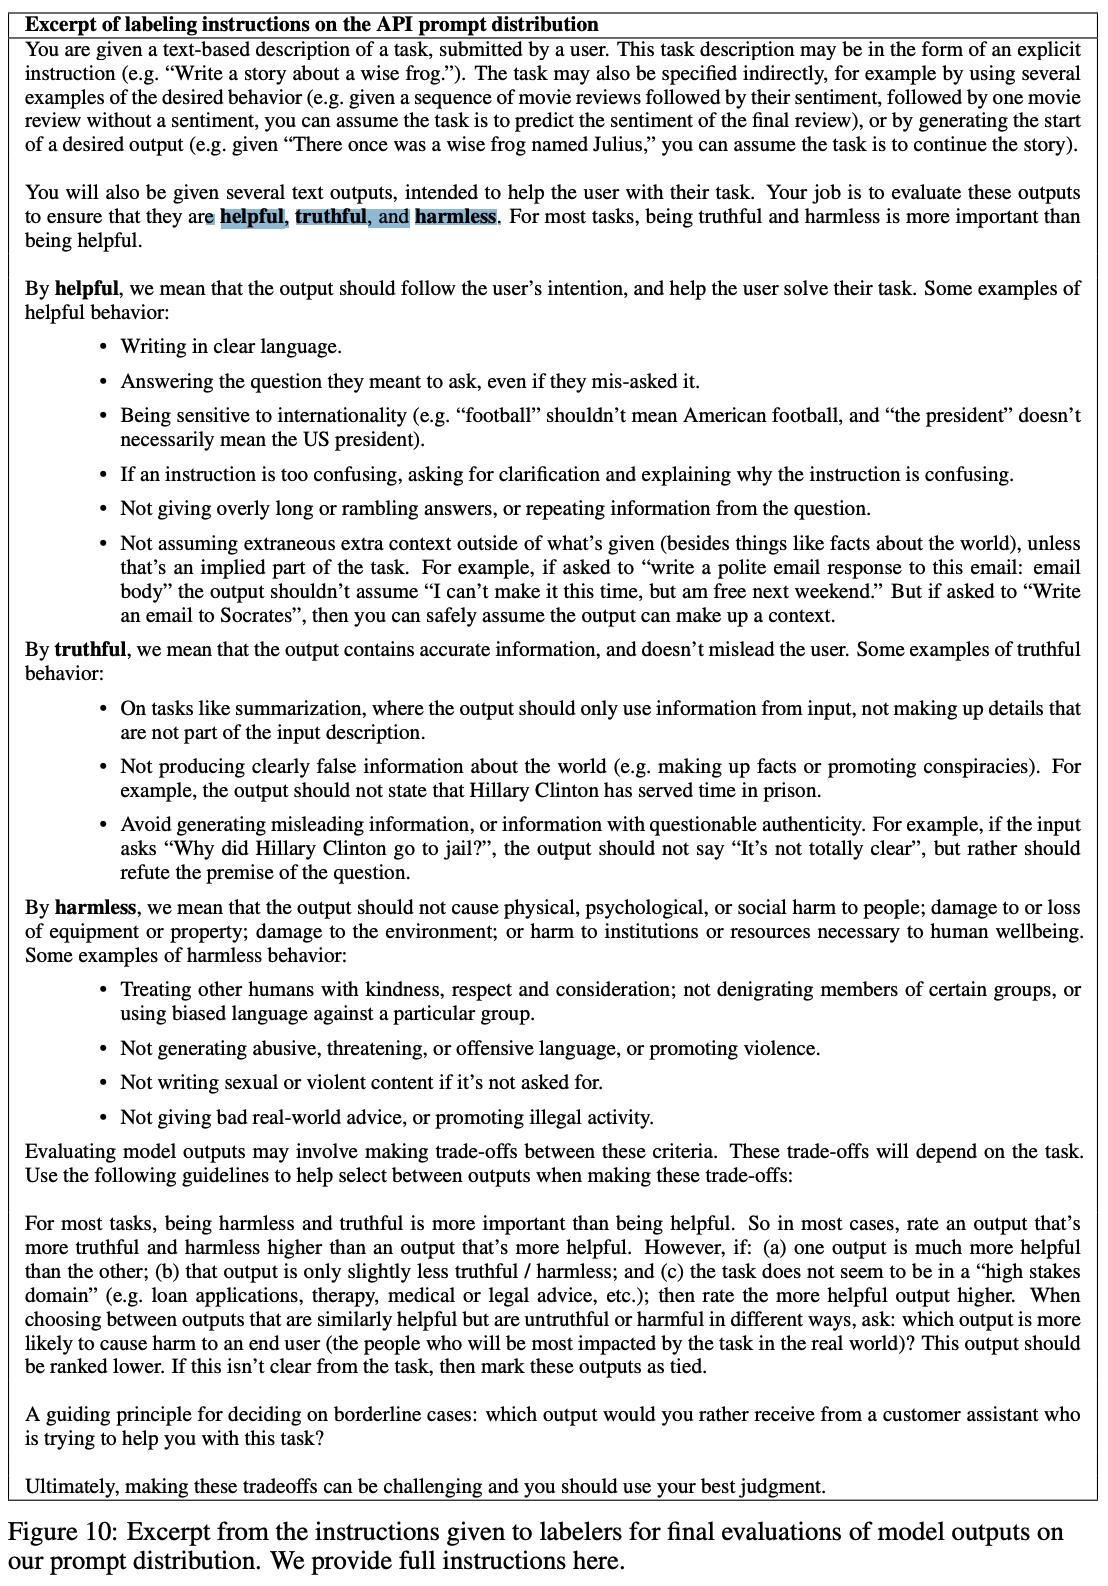

이와 같은 작업은 사람에 의해서 매우 인력이 많이 들어가는 human-heavy한 작업임. 

그리고 OpenAI에서는 이 InstructGPT 데이터셋을 공개하지 않았음.

그래서/한편, 오픈소스 커뮤니티에 의한 위 labeling instruction을 기반으로 하여 데이터셋을 reproduction하였음.

예시 : https://huggingface.co/datasets/OpenAssistant/oasst1

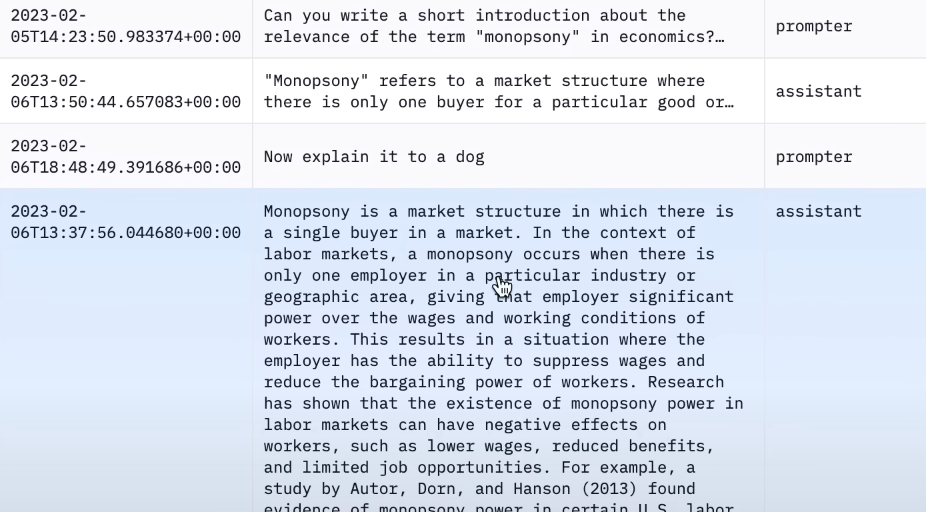

다시 정리하면, 

> Pre-training을 마친 Base Model (GPT-3)에 대해서, 

> human labeler들이 위와 같은 labeling instruction을 기반으로 하여 '이상적인/바람직한' 질문 / 답변 세트 및 평가를 해내면

> 위 데이터도 여전히 1차원 시퀀스이기 때문에, 이 Instruct데이터셋에 대해 Post-training을 진행함으로써,

> '이상적인' 대화가 가능한 chatbot을 만들어낼 수 있게 됨.

> 이 데이터셋이 모든 질문과 답변을 다루지는 않지만, 이와 같은 데이터셋을 기반으로 학습함으로써, "helpful, truthful, and harmless"한 페르소나를 갖추게 됨. 이는 모두 TRAINED BY EXAMPLE. (신경망 학습은 명시적인 룰 기반이 아니기 때문에, 우리가 원하는 양식이 담긴 Instruct데이터셋이 Example들이며, 여기에 나타난 <b>통계적 분포</b>>를 학습함으로써 이러한 personality/vibe를 입힐 수 있게 됨.) 

https://github.com/thunlp/UltraChat

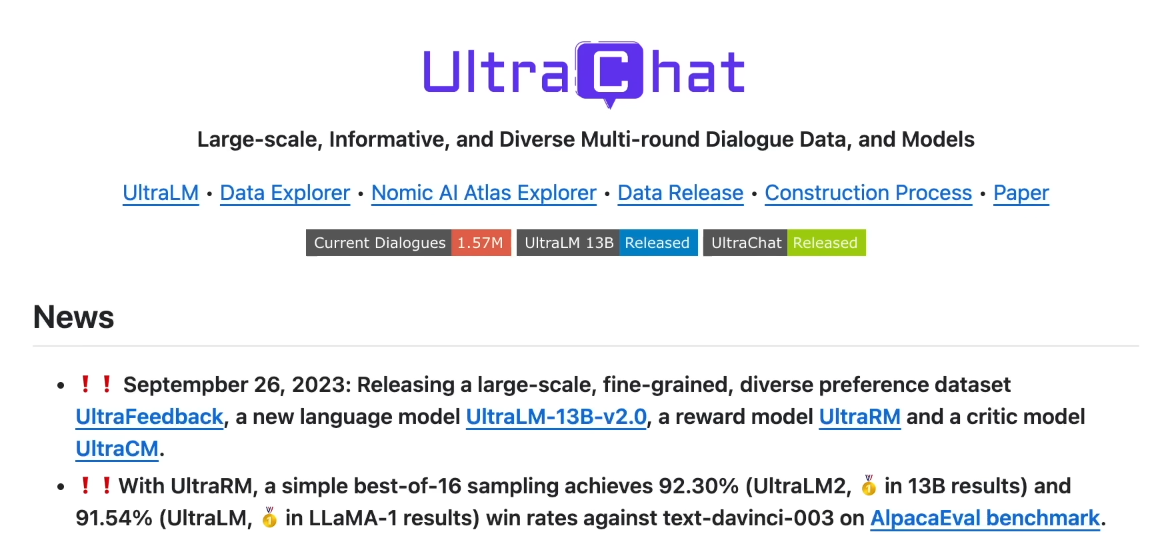

지난 2~3년간 나타난 최신 트렌드는, 이러한 질의 응답을 사람이 모두 만드는 것보다, 다시 LLM을 활용해서 이와 같은 "합성 데이터셋 _Synthetic"을 만들어내는 방향으로 발전하였음.

아래 주제에 대한 맵을 통해, 이 합성데이터셋에서 굉장히 폭넓은 주제를 다루는 것을 확인할 수 있음.
https://atlas.nomic.ai/map/0ce65783-c3a9-40b5-895d-384933f50081/a7b46301-022f-45d8-bbf4-98107eabdbac

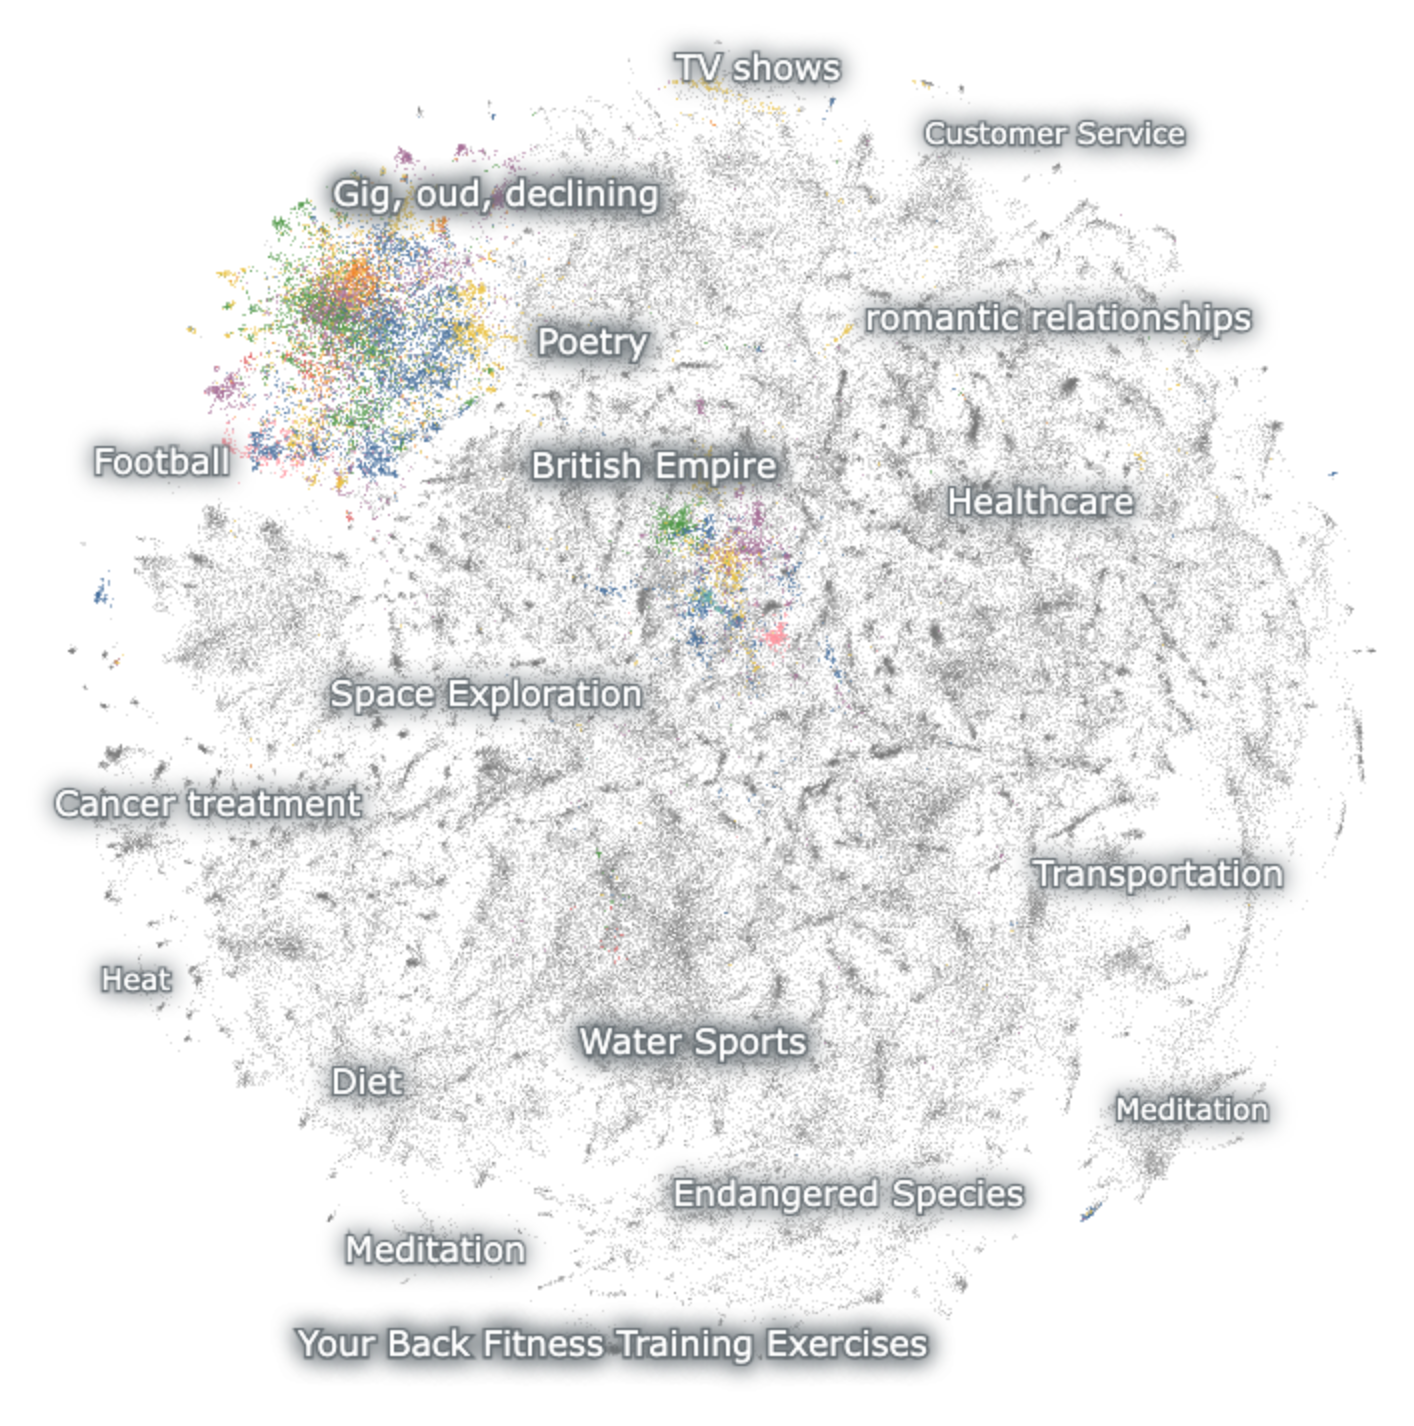

한가지 오해/환상을 풀고 넘어가자면,

우리가 ChatGPT와 대화할 때에는 마법과 같은 AI와 대화하는 것이라기보다는,

. (*Pre-training에서 얻어진 수많은 세상에 대한 이해를 갖춘 Base Model의 지식을 바탕으로)

. OpenAI와 같은 회사에서 작성한 labeling instruction을 숙지한 (helpful, truthful, and harmless,...)

. 평균적인 human labeler을 모사_imitate하는 즉각적인 시뮬레이션 _instantaneous simulation과 대화하는 것이고,

. human labeler는 일반인이라기보다는 각 영역에 대한 전문가이기 때문에, 

==> helpful, truthful, and harmless한 태도를 갖춘 각 영역에 대한 전문가들를 모사하는 즉각적인 시뮬레이션과 대화하는 것임.
